In [1]:
import random

import pandas as pd
import numpy as np

import os
import sys

import librosa
import librosa.display
import seaborn as sns
import matplotlib.pyplot as plt

# to play the audio files
from IPython.display import Audio
from pydub import AudioSegment
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, BatchNormalization
from keras.callbacks import ReduceLROnPlateau
from keras.utils import np_utils, to_categorical
from keras.callbacks import ModelCheckpoint
import openpyxl
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow

In [2]:
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)


In [3]:
# Location of the dataset
# Path for Ravdess dataset
ravdess_train_directory = "datasets/train/RavdevsLow"
ravdess_test_directory = "datasets/test/RavdevsLow"
# Path for Savee dataset
savee_train_directory = "datasets/train/Savee"
savee_test_directory = "datasets/test/Savee"
# Path for Tess dataset
tess_train_directory = "datasets/train/TESS"
tess_test_directory = "datasets/test/TESS"
# Path for CREMA-D dataset
cremaD_train_directory = "datasets/train/CremaD"
cremaD_test_directory = "datasets/test/CremaD"
# Path for EVOV-DB
emoDB_train_directory = "datasets/train/EMODB"
# Path for JL
jl = "datasets/train/JL"
# Path for JL2
jl2 = "datasets/train/JL2"
# Path for IEMOCAP
iemocap = "datasets/train/IEMOCAP"
# Path for ML-END
mlEnd = "datasets/train/MLEnd"

In [4]:
def getRavdessDataframe(ravdess):
    ravdess_directory_list = os.listdir(ravdess)
    file_emotion = []
    file_path = []
    for file in ravdess_directory_list:
        part = file.split('.')[0]
        part = part.split('-')
        file_emotion.append(int(part[2]))
        file_path.append(ravdess + "/" + file)

    # dataframe for emotion of files
    emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

    # dataframe for path of files.
    path_df = pd.DataFrame(file_path, columns=['Path'])
    Ravdess_df = pd.concat([emotion_df, path_df], axis=1)
    # Happy and surprise merged, 8 was initially surprise
    #
    # changing integers to actual emotions.
    Ravdess_df.Emotions.replace({1: 'neutral', 2: 'neutral', 3: 'happy', 4: 'sad',
                                 5: 'angry', 6: 'sad', 7: 'angry', 8: 'happy'}, inplace=True)
    return Ravdess_df


def getCremaDataframe(cremaD):
    crema_directory_list = os.listdir(cremaD)
    file_emotion = []
    file_path = []

    for file in crema_directory_list:
        # storing file paths

        # storing file emotions
        part = file.split('_')
        if part[2] == 'SAD':
            file_path.append(cremaD + "/" + file)
            file_emotion.append('sad')
        elif part[2] == 'FEA':
            continue
            # file_emotion.append('sad')
        elif part[2] == 'ANG':
            file_path.append(cremaD + "/" + file)
            file_emotion.append('angry')
        elif part[2] == 'DIS':
            continue
            # file_emotion.append('angry')
        elif part[2] == 'HAP':
            file_path.append(cremaD + "/" + file)
            file_emotion.append('happy')
        elif part[2] == 'NEU':
            file_path.append(cremaD + "/" + file)
            file_emotion.append('neutral')
        else:
            continue
            # file_emotion.append('Unknown')

    # dataframe for emotion of files
    emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

    # dataframe for path of files.
    path_df = pd.DataFrame(file_path, columns=['Path'])
    Crema_df = pd.concat([emotion_df, path_df], axis=1)
    return Crema_df


def getTessDataframe(tess):
    tess_directory_list = os.listdir(tess)
    file_emotion = []
    file_path = []

    for dir in tess_directory_list:
        directories = os.listdir(tess + "/" + dir)
        for file in directories:
            part = file.split('.')[0]
            part = part.split('_')[2]
            if part == 'ps':
                continue
                # file_emotion.append('happy')
            elif part == "disgust":
                continue
                file_emotion.append("angry")
            elif part == "fear":
                file_emotion.append("sad")
            else:
                file_emotion.append(part)
            file_path.append(tess + "/" + dir + '/' + file)

    # dataframe for emotion of files
    emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

    # dataframe for path of files.
    path_df = pd.DataFrame(file_path, columns=['Path'])
    Tess_df = pd.concat([emotion_df, path_df], axis=1)
    return Tess_df


def getSaveeDataframe(savee):
    savee_directory_list = os.listdir(savee)

    file_emotion = []
    file_path = []

    for file in savee_directory_list:
        part = file.split('_')[1]
        ele = part[:-6]
        if ele == 'a':
            file_path.append(savee + "/" + file)
            file_emotion.append('angry')
        elif ele == 'd':
            continue
            # file_emotion.append('angry')
        elif ele == 'f':
            continue
            # file_emotion.append('sad')
        elif ele == 'h':
            file_path.append(savee + "/" + file)
            file_emotion.append('happy')
        elif ele == 'n':
            file_path.append(savee + "/" + file)
            file_emotion.append('neutral')
        elif ele == 'sa':
            file_path.append(savee + "/" + file)
            file_emotion.append('sad')
        else:
            file_path.append(savee + "/" + file)
            file_emotion.append('happy')

    # dataframe for emotion of files
    emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])
    # dataframe for path of files.
    path_df = pd.DataFrame(file_path, columns=['Path'])
    Savee_df = pd.concat([emotion_df, path_df], axis=1)
    return Savee_df


# def getEmoDataframe(emoDB):
#     emoDb_directory_list = os.listdir(emoDB)
#     file_emotion = []
#     file_path = []
#
#     for dir in emoDb_directory_list:
#         parentFolder = emoDB + "/" + dir
#         actorsList = os.listdir(parentFolder)
#         for folders in actorsList:
#             childFolder = parentFolder + "/" + folders
#             files = os.listdir(childFolder)
#             for item in files:
#                 part = item.split("_")
#                 if part[0].lower() == "anger":
#                     file_emotion.append("angry")
#                 elif part[0].lower() == "amused":
#                     file_emotion.append("surprise")
#                 else:
#                     file_emotion.append(part[0].lower())
#                 # file_emotion.append(part[0])
#                 file_path.append(childFolder + "/" + item)
#
#     emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])
#     path_df = pd.DataFrame(file_path, columns=['Path'])
#     emoDB_df = pd.concat([emotion_df, path_df], axis=1)
#     return emoDB_df


In [5]:
def getEmotionsCount(dataframeToCount):
    emotionCount = {}
    for i in dataframeToCount.index:
        emotions = dataframeToCount["Emotions"][i]
        if emotions in emotionCount:
            emotionCount[emotions] += 1
        else:
            emotionCount[emotions] = 1
    emotionCount = dict(sorted(emotionCount.items(), key=lambda x: x[0]))
    print(emotionCount)

In [6]:
def getEmotionsAfterUnderSampling(dataframeToUnderSample):
    # smallCount = min(emotionCount.values())
    counts = dataframeToUnderSample['Emotions'].value_counts()
    # find the minimum count
    min_count = counts.min()
    # create a list to store the balanced dataframes
    balanced_dfs = []
    # iterate over the emotions
    for emotion in counts.index:
        # subset the data for the current emotion to have the minimum count
        balanced_df = dataframeToUnderSample[dataframeToUnderSample['Emotions'] == emotion].head(min_count)
        balanced_dfs.append(balanced_df)
    # concatenate all the balanced dataframes into one final dataframe
    final_df = pd.concat(balanced_dfs)
    return final_df

In [7]:
def create_waveplot(data, sr, e):
    plt.figure(figsize=(10, 3))
    plt.title('Waveplot for audio with {} emotion'.format(e), size=15)
    librosa.display.waveshow(data, sr=sr)
    plt.show()


def create_spectrogram(data, sr, e):
    # stft function converts the data into short term fourier transform
    X = librosa.stft(data)
    Xdb = librosa.amplitude_to_db(abs(X))
    plt.figure(figsize=(12, 3))
    plt.title('Spectrogram for audio with {} emotion'.format(e), size=15)
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
    # librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
    plt.colorbar()


In [8]:
def noise(data):
    noise_amp = 0.035 * np.random.uniform() * np.amax(data)
    data = data + noise_amp * np.random.normal(size=data.shape[0])
    return data


def stretch(data, rate=0.8):
    return librosa.effects.time_stretch(data, rate)


def shift(data):
    shift_range = int(np.random.uniform(low=-5, high=5) * 1000)
    return np.roll(data, shift_range)


def pitch(data, sampling_rate, pitch_factor=0.7):
    return librosa.effects.pitch_shift(data, sampling_rate, pitch_factor)


def volumeAdd(data):
    songData = AudioSegment.from_wav(data)
    print("sing", songData)
    songDataSamples = np.array(songData.get_array_of_samples())
    songHighVolumed = songDataSamples - 10000.0
    print(songHighVolumed)
    return songHighVolumed


In [9]:
def extract_features(data):
    # ZCR
    result = np.array([])
    zcr = np.mean(librosa.feature.zero_crossing_rate(y=data).T, axis=0)
    result = np.hstack((result, zcr))  # stacking horizontally

    # Chroma_stft
    stft = np.abs(librosa.stft(data))
    chroma_stft = np.mean(librosa.feature.chroma_stft(
        S=stft, sr=sample_rate).T, axis=0)
    result = np.hstack((result, chroma_stft))  # stacking horizontally

    # MFCC
    mfcc = np.mean(librosa.feature.mfcc(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mfcc))  # stacking horizontally

    # Root Mean Square Value
    rms = np.mean(librosa.feature.rms(y=data).T, axis=0)
    result = np.hstack((result, rms))  # stacking horizontally

    # MelSpectogram
    mel = np.mean(librosa.feature.melspectrogram(
        y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mel))  # stacking horizontally

    return result


def get_features(path):
    # duration and offset are used to take care of the no audio in start and the ending of each audio files as seen above.
    data, sample_rate = librosa.load(path, duration=2.5, offset=0.6)

    # without augmentation
    res1 = extract_features(data)
    result = np.array(res1)

    # data with noise
    noise_data = noise(data)
    res2 = extract_features(noise_data)
    result = np.vstack((result, res2))  # stacking vertically

    # data with stretching and pitching
    new_data = stretch(data)
    data_stretch_pitch = pitch(new_data, sample_rate)
    res3 = extract_features(data_stretch_pitch)
    result = np.vstack((result, res3))  # stacking vertically

    return result


In [10]:
# trainingDF
ravdess_train_df = getRavdessDataframe(ravdess_train_directory)
crema_train_df = getCremaDataframe(cremaD_train_directory)
tess_train_df = getTessDataframe(tess_train_directory)
savee_train_df = getSaveeDataframe(savee_train_directory)
# emo_train_df = getEmoDataframe(emoDB_train_directory)

# Testing df
ravdess_test_df = getRavdessDataframe(ravdess_test_directory)
crema_test_df = getCremaDataframe(cremaD_test_directory)
tess_test_df = getTessDataframe(tess_test_directory)
savee_test_df = getSaveeDataframe(savee_test_directory)

In [11]:
getEmotionsCount(ravdess_train_df)
getEmotionsCount(ravdess_test_df)

{'angry': 277, 'happy': 260, 'neutral': 194, 'sad': 276}
{'angry': 54, 'happy': 68, 'neutral': 47, 'sad': 48}


In [12]:
ravdess_train_df = getEmotionsAfterUnderSampling(ravdess_train_df)
ravdess_train_df.head()

,Emotions,Path
461,angry,datasets/train/RavdevsLow/03-01-05-01-01-01-02...
462,angry,datasets/train/RavdevsLow/03-01-05-01-01-01-03...
463,angry,datasets/train/RavdevsLow/03-01-05-01-01-01-04...
464,angry,datasets/train/RavdevsLow/03-01-05-01-01-01-06...
465,angry,datasets/train/RavdevsLow/03-01-05-01-01-01-07...


In [13]:
getEmotionsCount(ravdess_train_df)

{'angry': 194, 'happy': 194, 'neutral': 194, 'sad': 194}


In [14]:
crema_train_df.to_csv("c.csv")

In [15]:
getEmotionsCount(crema_train_df)

{'angry': 900, 'happy': 907, 'neutral': 781, 'sad': 883}


In [16]:
crema_train_df = getEmotionsAfterUnderSampling(crema_train_df)
crema_train_df.head()

,Emotions,Path
5,happy,datasets/train/CremaD/1001_IEO_HAP_HI.wav
6,happy,datasets/train/CremaD/1001_IEO_HAP_LO.wav
11,happy,datasets/train/CremaD/1001_IOM_HAP_XX.wav
14,happy,datasets/train/CremaD/1001_ITH_HAP_XX.wav
18,happy,datasets/train/CremaD/1001_ITS_HAP_XX.wav


In [17]:
getEmotionsCount(crema_train_df)

{'angry': 781, 'happy': 781, 'neutral': 781, 'sad': 781}


In [18]:
getEmotionsCount(tess_train_df)
# tess_train_df = pd.concat([tess_train_df,emo_train_df], ignore_index=True)
# getEmotionsCount(tess_train_df)

{'angry': 286, 'happy': 286, 'neutral': 280, 'sad': 560}


In [19]:
tess_train_df = getEmotionsAfterUnderSampling(tess_train_df)
tess_train_df.head()

,Emotions,Path
852,sad,datasets/train/TESS/sad/OAF_back_sad.wav
853,sad,datasets/train/TESS/sad/OAF_bar_fear.wav
854,sad,datasets/train/TESS/sad/OAF_base_fear.wav
855,sad,datasets/train/TESS/sad/OAF_base_sad.wav
856,sad,datasets/train/TESS/sad/OAF_bean_fear.wav


In [20]:
getEmotionsCount(tess_train_df)

{'angry': 280, 'happy': 280, 'neutral': 280, 'sad': 280}


In [21]:
getEmotionsCount(savee_train_df)

{'angry': 49, 'happy': 74, 'neutral': 86, 'sad': 43}


In [22]:
savee_train_df = getEmotionsAfterUnderSampling(savee_train_df)
savee_train_df.head()

,Emotions,Path
22,neutral,datasets/train/Savee/DC_n01.wav
23,neutral,datasets/train/Savee/DC_n02.wav
24,neutral,datasets/train/Savee/DC_n03.wav
25,neutral,datasets/train/Savee/DC_n05.wav
26,neutral,datasets/train/Savee/DC_n06.wav


In [23]:
getEmotionsCount(savee_train_df)

{'angry': 43, 'happy': 43, 'neutral': 43, 'sad': 43}


In [24]:
# data_path = pd.concat([Ravdess_df, Crema_df, Tess_df, Savee_df,emoDB_df, jl_df, jl2_df, iemocap_df], axis = 0)
# data_path = pd.concat([Crema_df, Tess_df, Savee_df], axis=0)
# data_path = pd.concat([Savee_df], axis=0)
# data_path_train = pd.concat([ravdess_train_df, crema_train_df, tess_train_df, savee_train_df], axis=0)
# data_path_test = pd.concat([ravdess_test_df, crema_test_df, tess_test_df, savee_test_df], axis=0)
data_path_train = pd.concat([ravdess_train_df, tess_train_df, savee_train_df], axis=0)
data_path_test = pd.concat([ravdess_test_df, tess_test_df, savee_test_df], axis=0)
data_path_train.to_csv("data_path_EmotionsCombined_Training_RTS.csv", index=False)
data_path_test.to_csv("data_path_EmotionsCombined_Testing_RTS.csv", index=False)
data_path_train.head()

,Emotions,Path
461,angry,datasets/train/RavdevsLow/03-01-05-01-01-01-02...
462,angry,datasets/train/RavdevsLow/03-01-05-01-01-01-03...
463,angry,datasets/train/RavdevsLow/03-01-05-01-01-01-04...
464,angry,datasets/train/RavdevsLow/03-01-05-01-01-01-06...
465,angry,datasets/train/RavdevsLow/03-01-05-01-01-01-07...


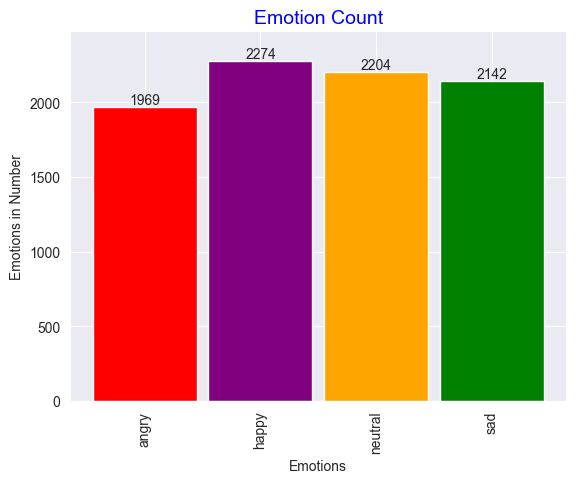

In [25]:
emotionCount = {'angry':1969, 'happy':2274,"neutral":2204,'sad':2142}
plt.bar(emotionCount.keys(), emotionCount.values(), width=0.9, align="center",
        color=["red","purple","orange","green","cyan","blue","yellow"])
plt.xlabel("Emotions")
plt.xticks(rotation=90)
plt.ylabel("Emotions in Number")
plt.title("Emotion Count", size=14, color="Blue")
plt.ylim([0, max(emotionCount.values()) + 200])
lst = []
for item in emotionCount:
    plt.text(item, emotionCount[item],
             emotionCount[item], ha="center", va="bottom")

In [70]:
emotionList = pd.read_csv("data_path_EmotionsCombined_Training_RTS.csv")
emotions = emotionList["Emotions"]
emotionCount = {}
for item in emotions:
    if item in emotionCount:
        emotionCount[item] += 1
    else:
        emotionCount[item] = 1
emotionCount = dict(sorted(emotionCount.items(), key=lambda x: x[0]))
print(emotionCount)

{'angry': 517, 'happy': 517, 'neutral': 517, 'sad': 517}


['angry', 'happy', 'neutral', 'sad']

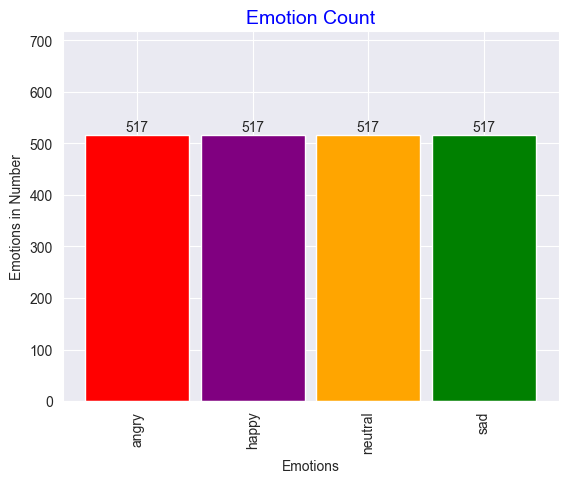

In [71]:
plt.bar(emotionCount.keys(), emotionCount.values(), width=0.9, align="center",
        color=["red", "purple", "orange", "green", "cyan", "blue", "yellow"])
plt.xlabel("Emotions")
plt.xticks(rotation=90)
plt.ylabel("Emotions in Number")
plt.title("Emotion Count", size=14, color="Blue")
plt.ylim([0, max(emotionCount.values()) + 200])
lst = []
for item in emotionCount:
    plt.text(item, emotionCount[item],
             emotionCount[item], ha="center", va="bottom")
sorted(emotionCount)

datasets/train/RavdevsLow/03-01-05-01-01-01-03.wav


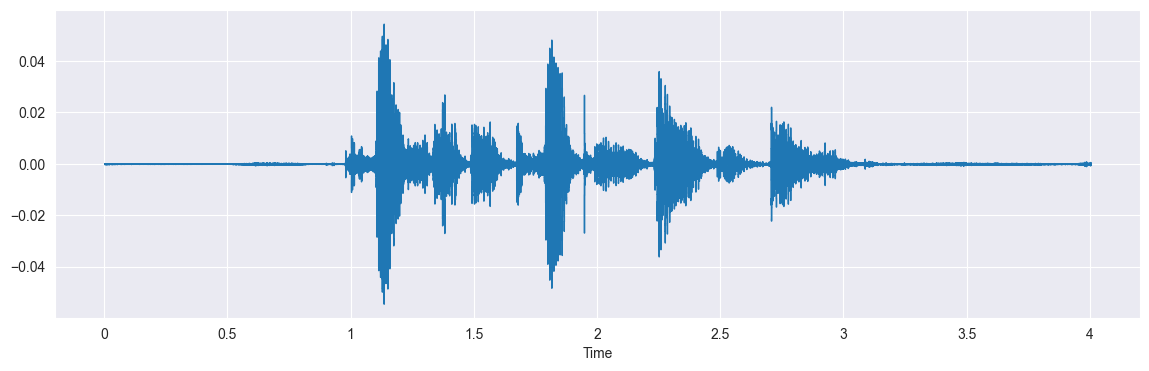

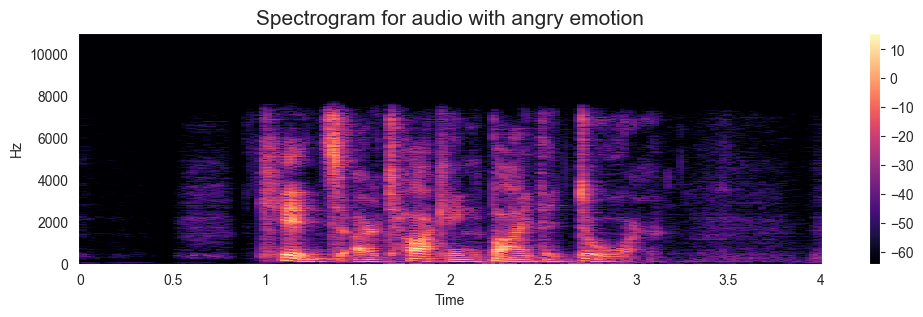

In [72]:
# taking any example and checking for techniques.
path = np.array(data_path_train.Path)[1]
print(path)
data, sample_rate = librosa.load(path)
plt.figure(figsize=(14, 4))
librosa.display.waveshow(y=data, sr=sample_rate)
Audio(path)
create_spectrogram(data, sample_rate, np.array(data_path_train.Emotions)[1])

In [73]:
X, Y = [], []
for path, emotion in zip(data_path_train.Path, data_path_train.Emotions):
    try:
        feature = get_features(path)
    except:
        print(path)
        print(emotion)
    for ele in feature:
        try:
            X.append(ele)
            # appending emotion 3 times as we have made 3 augmentation techniques on each audio file.
            Y.append(emotion)
        except:
            print(ele)


X_test, Y_test = [], []
for path, emotion in zip(data_path_test.Path, data_path_test.Emotions):
    try:
        feature = get_features(path)
    except:
        print(path)
        print(emotion)
    for ele in feature:
        try:
            X_test.append(ele)
            # appending emotion 3 times as we have made 3 augmentation techniques on each audio file.
            Y_test.append(emotion)
        except:
            print(ele)

In [74]:
len(X), len(Y), data_path_train.Path.shape
len(X_test), len(Y_test), data_path_test.Path.shape

(1722, 1722, (574,))

In [75]:
Features = pd.DataFrame(X)
Features['labels'] = Y
Features.to_excel('features_EmotionsCombined_Training_RTS.xlsx', index=False)
Features.head()

Features_test = pd.DataFrame(X_test)
Features_test['labels'] = Y_test
Features_test.to_excel('features_EmotionsCombined_Testing_RTS.xlsx', index=False)
Features_test.head()


,0,1,2,3,4,5,6,7,8,9,...,153,154,155,156,157,158,159,160,161,labels
0,0.184349,0.554770,0.535434,0.563187,0.599211,0.595693,0.612004,0.663623,0.715829,0.697005,...,1.245294e-14,1.034067e-14,8.932817e-15,7.914667e-15,7.134990e-15,6.557147e-15,6.148901e-15,5.876289e-15,5.722363e-15,neutral
1,0.346318,0.710514,0.721191,0.773508,0.795723,0.754883,0.693740,0.705933,0.740680,0.730525,...,4.414069e-04,4.503981e-04,4.859140e-04,4.698639e-04,4.723199e-04,4.565919e-04,4.672339e-04,4.633286e-04,4.680632e-04,neutral
2,0.160847,0.514857,0.524444,0.514256,0.551140,0.592216,0.565459,0.610365,0.655892,0.733371,...,1.448893e-14,1.291444e-14,1.095209e-14,1.049824e-14,1.112305e-14,1.258197e-14,1.310715e-14,1.317963e-14,1.250096e-14,neutral
3,0.126383,0.590897,0.589038,0.584067,0.710345,0.686461,0.544986,0.565342,0.602420,0.664847,...,1.266375e-16,1.241510e-16,1.238083e-16,1.364455e-16,1.151196e-16,1.112715e-16,1.091418e-16,1.028260e-16,9.876650e-17,neutral
4,0.196741,0.652331,0.680445,0.655000,0.741572,0.785041,0.600789,0.551283,0.583220,0.633817,...,1.684916e-05,1.711607e-05,1.725027e-05,1.753150e-05,1.718053e-05,1.733730e-05,1.802691e-05,1.637420e-05,1.674287e-05,neutral


In [76]:
x_train = Features.iloc[:, :-1].values
y_train = Features['labels'].values
x_test = Features_test.iloc[:, :-1].values
y_test = Features_test['labels'].values

In [77]:
features_train_df = pd.read_excel("features_EmotionsCombined_Training_RTS.xlsx")
features_test_df = pd.read_excel("features_EmotionsCombined_Testing_RTS.xlsx")

In [78]:
featuresofit = np.asarray(features_train_df.iloc[:, :-1].values)
x_train = featuresofit
labelofit = np.asarray(features_train_df['labels'])
y_train = labelofit

featuresofit_test = np.asarray(features_test_df.iloc[:, :-1].values)
x_test = featuresofit_test
labelofit_test = np.asarray(features_test_df['labels'])
y_test = labelofit_test

In [79]:
len(x_test), len(x_train)

(1722, 6204)

In [80]:
emotionsfromFeatures = features_train_df['labels']
emotionCountfromFeatures = {}
for item in emotionsfromFeatures:
    if item in emotionCountfromFeatures:
        emotionCountfromFeatures[item] += 1
    else:
        emotionCountfromFeatures[item] = 1
print(emotionCountfromFeatures)

{'angry': 1551, 'sad': 1551, 'happy': 1551, 'neutral': 1551}


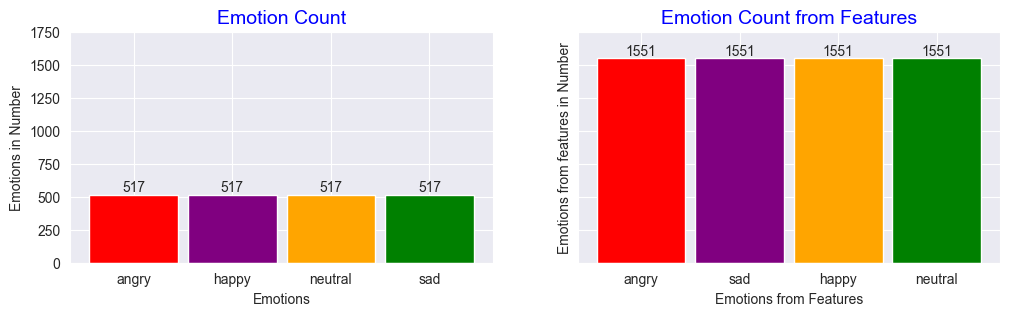

In [81]:
fig, (plt1, plt2) = plt.subplots(1, 2, sharey=True, figsize=(12, 3))
plt1.bar(emotionCount.keys(), emotionCount.values(), width=0.9, align="center",
         color=["red", "purple", "orange", "green", "cyan", "blue", "yellow"])
plt1.set_xlabel("Emotions")
plt1.set_ylabel("Emotions in Number")
plt1.set_title("Emotion Count", size=14, color="Blue")
plt1.set_ylim([0, max(emotionCount.values()) + 200])
# lst = []
for item in emotionCount:
    plt1.text(item, emotionCount[item],
              emotionCount[item], ha="center", va="bottom")

plt2.bar(emotionCountfromFeatures.keys(), emotionCountfromFeatures.values(), width=0.9, align="center",
         color=["red", "purple", "orange", "green", "cyan", "blue", "yellow"])
plt2.set_xlabel("Emotions from Features")
plt2.set_ylabel("Emotions from features in Number")
plt2.set_title("Emotion Count from Features", size=14, color="Blue")
plt2.set_ylim([0, max(emotionCountfromFeatures.values()) + 200])
# lst = []
for item in emotionCountfromFeatures:
    plt2.text(item, emotionCountfromFeatures[item],
              emotionCountfromFeatures[item], ha="center", va="bottom")
# plt2.subplots(nrows=1,ncols=2)

In [82]:
# print(Y)
# x_train, x_test, y_train, y_test = train_test_split(
#     X, Y, random_state=0, test_size=0.1, shuffle=True)
# x_train.shape, y_train.shape, x_test.shape, y_test.shape
# # pd.DataFrame(Y)

In [83]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((6204, 162), (6204,), (1722, 162), (1722,))

In [84]:
# C_choice = [150,200,250,300,350]
# C_choice = [0.5, 0.6, 0.8, 0.9, 1]


In [85]:
from sklearn import svm
from sklearn.metrics import accuracy_score

classifier = svm.SVC(kernel='linear', gamma="auto", C=1)
classifier.fit(x_train, y_train)
y_predict = classifier.predict(x_test)
accuracyPercent = accuracy_score(y_test, y_predict) * 100
print("Kernel:  " + "linear" + "  ||  " + " C: " + str(1) + "  ||  Accuracy" + "  :  " + str(accuracyPercent))

Kernel:  linear  ||   C: 1  ||  Accuracy  :  65.96980255516841


In [86]:
y_predict_train = classifier.predict(x_train)
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_predict_train)))

Training-set accuracy score: 0.8187


Confusion matrix, without normalization


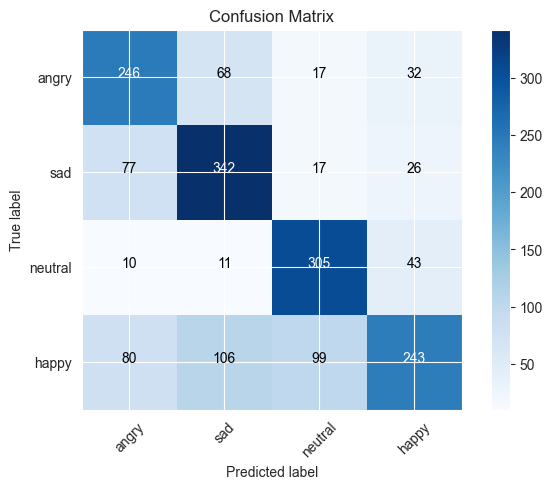

In [87]:
import itertools
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.metrics import accuracy_score, confusion_matrix


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


confusion = confusion_matrix(y_test, y_predict)
# df_confusion = pd.crosstab(y_test, y_predict, rownames=['True'], colnames=['Predicted'], margins=True)

plot_confusion_matrix(confusion, classes=["angry", "sad", "neutral", "happy"],
                      title='Confusion Matrix')
plt.show()

In [88]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

       angry       0.60      0.68      0.63       363
       happy       0.65      0.74      0.69       462
     neutral       0.70      0.83      0.76       369
         sad       0.71      0.46      0.56       528

    accuracy                           0.66      1722
   macro avg       0.66      0.68      0.66      1722
weighted avg       0.67      0.66      0.65      1722



In [89]:
# import joblib
# joblib.dump(classifier, "audio_svm_model_4DS.joblib")

In [90]:
# from joblib import dump
# dump(scaler, 'scaler.joblib')